<a href="https://colab.research.google.com/github/CallMeL/OML-hw/blob/master/accelerated_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise sheet 4

**Please turin in your exercises by Monday, December 2nd.**

## Task 1: L-smoothness

In the lecture we saw the importance of $L$-smoothness of a function and its relation to the step size. Determining the $L$ constant can be really hard and time consuming. Prove the following upper bound on the largest signular value of the matrix.

**Lemma**
For all matrices $A \in \mathbb{R}^{n\times m}$
$$
\|A\|_2 \leq \|A\|_F
$$
where $\|A\|_2$ is the spectral norm and $\|A\|_F$ is the Frobenius norm of matrix $A$.

**Proof**
$$
...
$$

Using the lemma above, approximate the constant $L$ of the function
$$
f(x) = \|Ax - b\|_2^2
$$
for the given matrices $A$ and vectors $b$ below. What is the true $L$ constant of those matrices?

How much operations, in big-O notation, is needed to compute $\|A\|_2$ and how much to compute $\|A\|_F$?

**PROOF**

Using the properties of the trace:

The trace of a matrix equals the sum of its eigenvalues, i.e.,
$
\text{tr}(A^\top A) = \sum_{i=1}^r \sigma_i^2,
$
where \( \sigma_i \) are the singular values of \( A \), and \( r \) is the rank of \( A \).

The spectral norm is given by the largest singular value:
$
\|A\|_2 = \sigma_{\max}.
$

Since the Frobenius norm involves the sum of squares of singular values:
$
\|A\|_F^2 = \sum_{i=1}^r \sigma_i^2 \geq \sigma_{\max}^2.
$

Taking the square root on both sides:
$
\|A\|_F \geq \|A\|_2.
$


How many operations, in big-O notation, are needed to compute $|A|_2$ and how many to compute $|A|_F$:
* $|A|_2$ : $ O(kn^2)$
*  $|A|_F$ : $ O(n^2)$

In [4]:
import numpy as np
rng = np.random.default_rng(seed=0)

def f(x):
    return np.linalg.norm(A@x - b)**2

def Lsmoothness(A):
  spectral_norm = np.linalg.norm(A, 2)  # Largest singular value
  frobenius_norm = np.linalg.norm(A, 'fro')

  true_L = 2 * spectral_norm**2
  approx_L = 2 * frobenius_norm**2

  print("Spectral Norm (||A||_2):", spectral_norm)
  print("Frobenius Norm (||A||_F):", frobenius_norm)
  print("True L:", true_L)
  print("Approximated L:", approx_L)

A = np.array([
    [ 1,  2,  0],
    [ 2,  2, -1],
    [ 2,  1,  1],
    [10,  0, -1],
    [ 0,  0, 10],
    [-1, -2, -1],
    [-3, -2, -1]
])
b = np.array([[1, 1, 1, 0, 0, 0, 0]])
Lsmoothness(A)

Spectral Norm (||A||_2): 11.09589863796424
Frobenius Norm (||A||_F): 15.524174696260024
True L: 246.23793316795334
Approximated L: 482.00000000000006


In [5]:
A = rng.normal(1., 2., size=(10000, 4000))
b = np.ones(10000)

Lsmoothness(A)

Spectral Norm (||A||_2): 6328.983629275508
Frobenius Norm (||A||_F): 14141.848086911688
True L: 80112067.55927476
Approximated L: 399983734.6265756


## Task 2: Running time

Gradient descent has a convergence rate of $O((1 - \frac{\mu}{L})^T)$ for strongly convex functions. Compare this to the convergence rate of the optimal method of $O((1 - \sqrt{\frac{\mu}{L}})^T)$. How many more iterations does gradient descent need as compared to the optimal method to achieve an approximate error of $\varepsilon$ for a function with condition number $Q_f := \frac{L}{\mu}$?

Plot the convergence rate over time for $Q_f = 10^4$ (assume big-O constanst are 1).

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def compute_rates(max_iter=100, Qf=10**4):
    grad_rates = []
    opt_rates = []
    diff_iterations = []

    for T in range(1, max_iter + 1):
        # Gradient descent convergence rate
        grad_rate = (1 - 1 / Qf) ** T

        # Optimal method convergence rate
        opt_rate = (1 - 1 / np.sqrt(Qf)) ** T

        # Compute number of extra iterations required
        extra_iters = T * (np.log(grad_rate) - np.log(opt_rate)) / np.log(grad_rate)

        grad_rates.append(grad_rate)
        opt_rates.append(opt_rate)
        diff_iterations.append(extra_iters)

    return grad_rates, opt_rates, diff_iterations

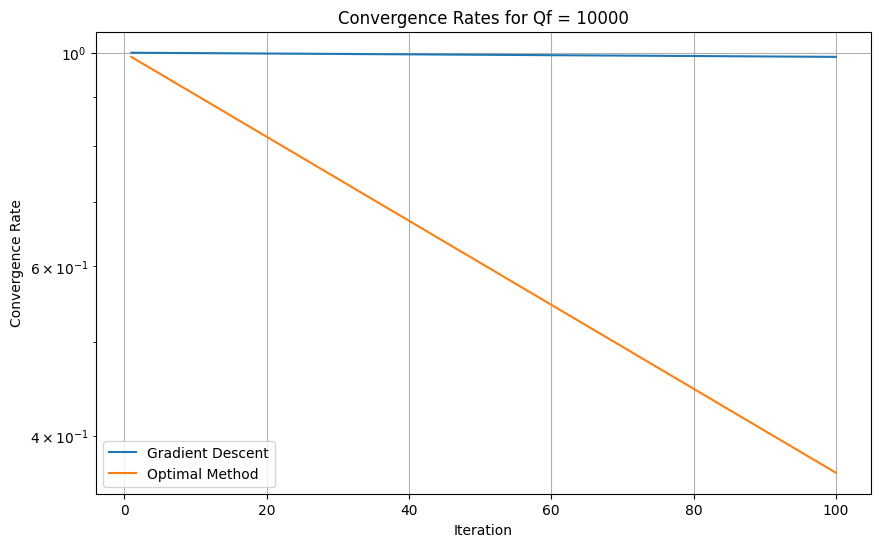

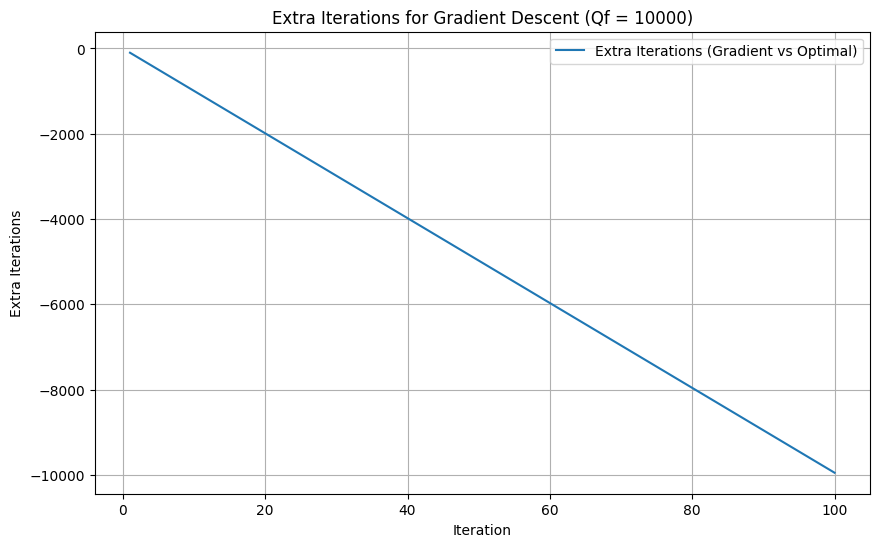

In [8]:
max_iter = 100
Qf = 10**4
grad_rates, opt_rates, diff_iterations = compute_rates(max_iter, Qf)

# Plot convergence rates
plt.figure(figsize=(10, 6))
plt.semilogy(range(1, max_iter + 1), grad_rates, label="Gradient Descent")
plt.semilogy(range(1, max_iter + 1), opt_rates, label="Optimal Method")
plt.xlabel("Iteration")
plt.ylabel("Convergence Rate")
plt.title(f"Convergence Rates for Qf = {Qf}")
plt.legend()
plt.grid()
plt.show()

# Plot difference in iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_iter + 1), diff_iterations, label="Extra Iterations (Gradient vs Optimal)")
plt.xlabel("Iteration")
plt.ylabel("Extra Iterations")
plt.title(f"Extra Iterations for Gradient Descent (Qf = {Qf})")
plt.legend()
plt.grid()
plt.show()


## Utilities

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
def contour_map(f, xb=(-1,1), yb=(-1,1), ax=None):
    if ax is None:
        ax = plt
    (nx, ny) = (45, 45)
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    ax.contour(xv, yv, zv, 15)

def surface_plot(f, xb=(-1,1), yb=(-1,1)):
    (nx, ny) = (45, 45)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    ax.plot_surface(xv, yv, zv, cmap=cm.coolwarm)
    return fig, ax

In [ ]:
def backtracking_line_search(x, d, f, g, alpha=0.3, beta=0.8):
    step_size = 1.
    while f(x + step_size * d) > f(x) + alpha * step_size * g(x).dot(d):
        step_size *= beta
    return step_size

def gradient_descent_path(x0, f, g, max_iter=100):
    xs = [x0]
    for _ in range(max_iter):
        step = backtracking_line_search(x0, -g(x0), f, g)
        x0 = x0 - step * g(x0)
        xs.append(x0)
    return xs

In [ ]:
EXA = np.array([[30., 15],[-20, 25]])/20

EXAMPLES = [
    (lambda x: x.T@EXA@x + 1, lambda x: (EXA+EXA.T)@x, 0.5 * np.ones(2), (-1.,1.), (-1.,1.)),
    (lambda x: (x[0]**2 + 30 * x[1]**2 + 4 * x[0]), lambda x: np.array([2 * x[0] + 4, 60 * x[1]]), np.array([2.,3.]), (-2.5,2.5), (-1.5,3.5)),
    (lambda x: np.linalg.norm(np.sin(x*3))**2, lambda x: 6 * np.sin(x*3) * np.cos(x*3), np.array([.3,.5]), (-1.5, 1.), (-1.,1.))
]

def run_examples_heavy_ball():
    for (f, g, x0, xb, yb) in EXAMPLES:
        xs2 = heavy_ball_path(x0, f, g)
        xs2 = np.array(xs2)

        xs = gradient_descent_path(x0, f, g)
        xs = np.array(xs)

        contour_map(f, xb=xb, yb=yb)
        plt.plot(xs2[:,0], xs2[:,1], '.--k', label='heavy ball')
        plt.plot(xs[:,0], xs[:,1], '.--', color='gray', alpha=.5, label='gradient descent')
        plt.legend()
        plt.show()


def run_examples_nag():
    for (f, g, x0, xb, yb) in EXAMPLES:
        xs2 = nag_path(x0, f, g)
        xs2 = np.array(xs2)

        xs = gradient_descent_path(x0, f, g)
        xs = np.array(xs)

        contour_map(f, xb=xb, yb=yb)
        plt.plot(xs2[:,0], xs2[:,1], '.--k', label='nesterov')
        plt.plot(xs[:,0], xs[:,1], '.--', color='gray', alpha=.5, label='gradient descent')
        plt.legend()
        plt.show()

## Task 3: Polyak's heavy ball method

Implement Polyak's heavy ball method and the coresponding line search. **Standard backtracking line search is not usable here.**
* `x0` is the initial point.
* `f` is the function you are trying to minimize.
* `g` is the gradient of `f`.

Function `heavy_ball_path` should return a list of vectors on the path to the minimum.

In [ ]:
def heavy_ball_path(x0, f, g, max_iter=100):
    return ...

In [ ]:
# run this to get plots
run_examples_heavy_ball()

## Task 4: Nesterov accelerated gradient method and backtracking line search

Implement Nesterov's accelerated gradient method and the coresponding line search. **Standard backtracking line search is not usable here.**

* `x0` is the initial point.
* `f` is the function you are trying to minimize.
* `g` is the gradient of `f`.

Function `nag_path` should return a list of vectors on the path to the minimum.

In [ ]:
def nag_path(x0, f, g, max_iter=100):
    return ...

In [ ]:
run_examples_nag()

## Task 5: Error plots

Compare and plot the error over time for the three methods on the following tasks.

### Simple quadratic function

In [ ]:
f = lambda x: (x[0]**2 + 30 * x[1]**2 + 4 * x[0])
g = lambda x: np.array([2 * x[0] + 4, 60 * x[1]])
x0 = np.array([2.,3.])

x_star = np.array([-2.,0.])
...

### Linear regression

In [ ]:
from sklearn.datasets import make_regression

def f(w):
    return np.linalg.norm(X @ w - y) ** 2 / len(X)

def g(w):
    return 2 * X.T @ (X @ w - y) / len(X)

X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)
x0 = np.zeros(100)

x_star = np.linalg.lstsq(X, y, rcond=None)[0]
...

### Logistic regression


In [ ]:
from sklearn.datasets import make_classification
from scipy.optimize import minimize

def f(w):
    return np.log(1. + np.exp(-y * X.dot(w))).mean() + np.linalg.norm(w)**2

def g(w):
    sig = np.exp(-y * X.dot(w))
    return 2*w - X.T.dot(sig * y / (sig + 1.)) / X.shape[0]

X, y = make_classification(1000, 80, n_informative=40,
#                               n_redundant=0,
                               n_clusters_per_class=2, flip_y=0.1, random_state=0)

x0 = np.zeros(80)
x_star = minimize(f, x0, jac=g).x
...